WESTERN GOVERNOR'S UNIVERSITY 
COLLEGE OF IT
D-209 DATA MINING I
TASK 1: CLASSIFICATION ANALYSIS

BY PAOLA WILLIAMS

Table of Contents

A1. Proposal of question

A2. Defined goal

B1. Explanation of classification method

B2. Summary of method assumption

B3. Packages or libraries list

C1. Data preprocessing

C2. Data set variables

C3. Steps for analysis

C4. Cleaned data set

D1. Splitting the data 

D2. Output and intermediate calculations

D3. Code execution

E1. Accuracy and AUC

E2. Results and implications

E3. Limitation

E4. Course of action

F. Panopto recording

G. Sources for third-party code

H. Sources 

I. Professional Communication

A1. Proposal of question

Predict whether or not customers will discontinue services at the company.

A2. Defined goal

-Predict customers' churning outcome, either Yes or No, in a binary format.

B1. Explanation of classification method

The classification method chosen is K Nearest Neighbors (KNN). It is used as a predictive model where the data points are categorized into groups depending on the distance between them. It is an supervised machine learning model, i.e., it relies on labeled data to learn a function that predicts the outcome of unlabeled data (Harrison, 2018).

In this case, the algorithm will take the churn data and will predict if a customer will churn or not in terms of 1 or 0.


B2. Summary of method assumption

KNN is a non-parametric learning algorithm which means there is no assumption for underlying data distribution. This usually means that the population does not have a normal distribution since the data consist of continuous data rather than discrete v(Non-Parametric Model).

B3. Packages or libraries list

The following packages are used to create the model area:

- Pandas. We will use get_dummies function to convert the categorical variables into dummy variables.

- From sklearn, we will use:
  - Standard scaler from preprocessing to standardize the numerical variables.
  - Train_test_split from modek_selection to split the dataset into training and testing sets.
  - Confusion_matrix and accuracy score from metrics to create the confusion matrix and calculate the accuracy score.
  - KNeighborsClassifier from neighbors to create the KNN model with the dataset.

C1. Data preprocessing

Converting categorical variables into dummy variables is one of the most relevant data preprocessing goals. This model only takes in categorical variables in binary type. We will use the get_dummies package from the Pandas library.


C2. Data set variables

In this study, the response variable is Churn. We will use the most relevant predictor variables and remove those that are not significant to predicting customers' churning. The continuous predictor variables chosen are:
'Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year'.

The categorical predictor variables are:
'State','Churn','Area','Marital','Gender','Techie','Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod'.

In [95]:
%pip install --upgrade pip

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

In [97]:
df = pd.read_csv(r"C:\Users\paowm\Downloads\churn_clean.csv")

In [98]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [99]:
df = df[['Population','State', 'Area','Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year']]

We can see below the summary statistics of the numerical variables in the dataset. 

In [100]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


C3. Steps to prepare data

1. Data cleaning: Detecting and cleaning Nulls

In [101]:
df.isnull().sum()

Population              0
State                   0
Area                    0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

2. Detecting and treating outliers

In [102]:
df['Z_Score_Children']=stats.zscore(df['Children'])
sum(df.Z_Score_Children > 3)

191

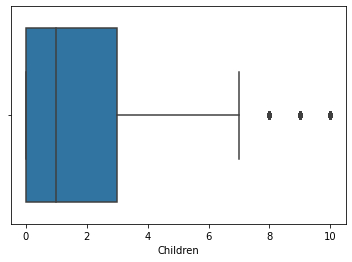

In [103]:
c =sns.boxplot(x='Children', data=df)

In [104]:
df['Children'] = np.where(df['Z_Score_Children'] > 3, df['Children'].median(), df['Children'])
df['Z_Score_Children']=stats.zscore(df['Children'])

In [105]:
df['Z_Score_Age']=stats.zscore(df['Age'])
sum((df.Z_Score_Age < -3) | (df.Z_Score_Age > 3))

0

In [106]:
df['Z_Score_Income']=stats.zscore(df['Income'])
sum((df.Z_Score_Income < -3) | (df.Z_Score_Income > 3))

145

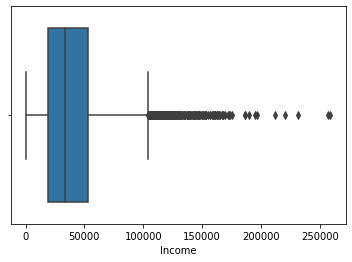

In [107]:
c =sns.boxplot(x='Income', data=df)

In [108]:
df['Income'] = np.where(df['Z_Score_Income'] > 3, df['Income'].median(), df['Income'])
df['Z_Score_Income']=stats.zscore(df['Income'])

In [109]:
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])
sum((df.Z_Score_Outage_sec_perweek< -3) | (df.Z_Score_Outage_sec_perweek > 3))

28

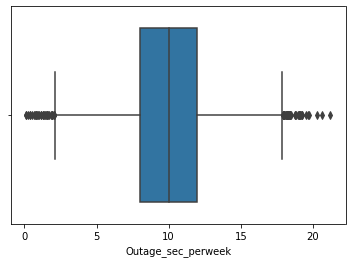

In [110]:
c =sns.boxplot(x='Outage_sec_perweek', data=df)

In [111]:
sum(df.Z_Score_Outage_sec_perweek > 3)

15

In [112]:
df['Outage_sec_perweek'] = np.where(df['Z_Score_Outage_sec_perweek'] > 3, df['Outage_sec_perweek'].median(), df['Outage_sec_perweek'])
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])

In [113]:
sum(df.Z_Score_Outage_sec_perweek < -3)

13

In [114]:
df['Outage_sec_perweek'] = np.where(df['Z_Score_Outage_sec_perweek'] < -3, df['Outage_sec_perweek'].median(), df['Outage_sec_perweek'])
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])

In [115]:
df['Z_Score_Email']=stats.zscore(df['Email'])
sum((df.Z_Score_Email < -3) | (df.Z_Score_Email > 3))

12

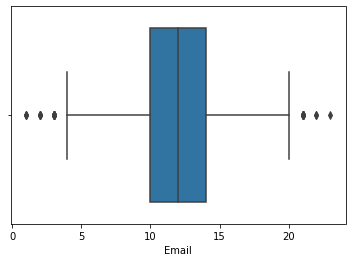

In [116]:
c =sns.boxplot(x='Email', data=df)

In [117]:
sum(df.Z_Score_Email < -3)

9

In [118]:
df['Email'] = np.where(df['Z_Score_Email'] < -3, df['Email'].median(), df['Email'])
df['Z_Score_Email']=stats.zscore(df['Email'])

In [119]:
sum(df.Z_Score_Email > 3)

3

In [120]:
df['Email'] = np.where(df['Z_Score_Email'] > 3, df['Email'].median(), df['Email'])
df['Z_Score_Email']=stats.zscore(df['Email'])

In [121]:
df['Z_Score_Contacts']=stats.zscore(df['Contacts'])
sum(df.Z_Score_Contacts > 3)

165

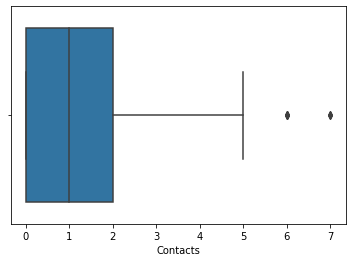

In [122]:
c =sns.boxplot(x='Contacts', data=df)

In [123]:
df['Contacts'] = np.where(df['Z_Score_Contacts'] > 3, df['Contacts'].median(), df['Contacts'])
df['Z_Score_Contacts']=stats.zscore(df['Contacts'])

In [124]:
df['Z_Score_Yearly_equip_failure']=stats.zscore(df['Yearly_equip_failure'])
sum((df.Z_Score_Yearly_equip_failure < -3) | (df.Z_Score_Yearly_equip_failure > 3))

94

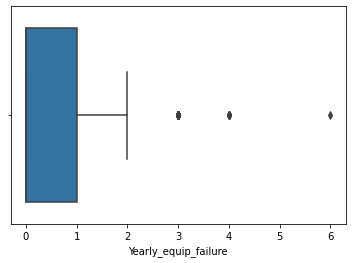

In [125]:
c =sns.boxplot(x='Yearly_equip_failure', data=df)

In [126]:
df['Yearly_equip_failure'] = np.where(df['Z_Score_Yearly_equip_failure'] > 3, df['Yearly_equip_failure'].median(), df['Yearly_equip_failure'])
df['Z_Score_Yearly_equip_failure']=stats.zscore(df['Yearly_equip_failure'])

In [127]:
df['Z_Score_Tenure']=stats.zscore(df['Tenure'])
sum((df.Z_Score_Tenure < -3) | (df.Z_Score_Tenure > 3))

0

In [128]:
df['Z_Score_Monthly_Charge']=stats.zscore(df['MonthlyCharge'])
sum((df.Z_Score_Monthly_Charge < -3) | (df.Z_Score_Monthly_Charge> 3))

0

In [129]:
df['Z_Score_Bandwidth_GB_Year']=stats.zscore(df['Bandwidth_GB_Year'])
sum((df.Z_Score_Bandwidth_GB_Year< -3) | (df.Z_Score_Bandwidth_GB_Year> 3))

0

In [130]:
df['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

3. Replace Churn outomes into 0 and 1

In [131]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df['Churn'].value_counts()

0    7350
1    2650
Name: Churn, dtype: int64

In [132]:
df = df.drop(columns=['Z_Score_Children','Z_Score_Age','Z_Score_Income','Z_Score_Outage_sec_perweek','Z_Score_Email', 'Z_Score_Contacts', 'Z_Score_Yearly_equip_failure', 'Z_Score_Tenure','Z_Score_Monthly_Charge', 'Z_Score_Monthly_Charge','Z_Score_Bandwidth_GB_Year'])

In [133]:
df.describe()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,1.925000,53.078400,38151.157582,0.265000,9.999841,12.022200,0.940800,0.368800,34.526188,172.624816,3392.341550
std,14432.698671,1.883383,20.698882,24850.801431,0.441355,2.933317,3.004565,0.891614,0.578464,26.443063,42.943094,2185.294852
min,0.000000,0.000000,18.000000,348.670000,0.000000,1.144796,3.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.000000,35.000000,19224.717500,0.000000,8.033911,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.000000,53.000000,33169.742500,0.000000,10.018270,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.000000,71.000000,51669.637500,1.000000,11.955480,14.000000,1.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,8.000000,89.000000,124025.100000,1.000000,18.851730,21.000000,3.000000,2.000000,71.999280,290.160419,7158.981530


In [134]:
df.to_csv(r'C:\Users\paowm\Desktop\churn_clean.csv')

In [135]:
df.dtypes

Population                int64
State                    object
Area                     object
Children                float64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                     int64
Outage_sec_perweek      float64
Email                   float64
Contacts                float64
Yearly_equip_failure    float64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
PaymentMethod            object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: o

4. Convert categorical variables into dummy variables

In [136]:
dummy_variables = ['State','Churn','Area','Marital','Gender','Techie','Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']

dummy_data = pd.get_dummies(df, prefix=dummy_variables, columns=dummy_variables, drop_first= True)
y = dummy_data['Churn_1']
dummy_data.drop(columns=['Churn_1'], inplace=True)


5. Standardized numerical variables

In [137]:
sc = StandardScaler()
to_transform = ['Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']

dummy_data.loc[:,to_transform] = sc.fit_transform(dummy_data.loc[:,to_transform])

C4. Cleaned datast

In [138]:
df.to_csv(r'C:\Users\paowm\clean_churn_data.csv', index = None, header=True)

D1. Splitting the data

We will split the dataset into training and testing sets, where 70% of the data will be assigned for training and 30% for testing.

In [139]:
X_train, X_test, y_train, y_test = train_test_split(dummy_data,y,test_size=.3, random_state=0)

In [146]:
pd.DataFrame(X_train, y_train).to_csv(r'C:\Users\paowm\training_set.csv')
pd.DataFrame(X_train, y_train).to_csv(r'C:\Users\paowm\testing_set.csv')

D2. Output and intermediate calculations

After splitting the dataset, we will do the following:

-Create a model with the KNeighborsClassifier() function. We will use n_jobs=1 as a parameter

-Fit the model to our training dataset with the fit() function

-Predict outcomes using the predict() function using the testing dataset

-Print the confusion matrix 

-Calculate the accuracy score

D3. Code execution

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Confusion Matrix 
 [[1982  219]
 [ 304  495]]
Accuracy Score:  0.8256666666666667


C:\Users\paowm\AppData\Local\Temp/ipykernel_24696/1655599372.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


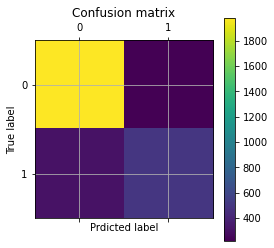

In [140]:
model = KNeighborsClassifier(n_jobs = 1)
model.fit(X_train, y_train)
print(model.get_params())
y_pred = list(map(round, model.predict(X_test)))

print('Confusion Matrix \n', confusion_matrix(y_test,y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

plt.matshow(confusion_matrix(y_test, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Prdicted label')
plt.grid(b=None)
plt.show()


E1. Accuracy and AUC

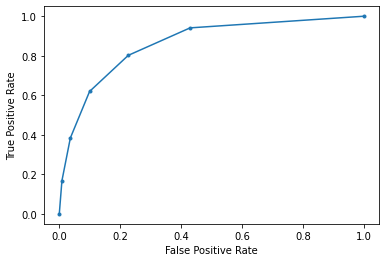

AUC: 0.861


In [141]:
probs = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probs[:,1])
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('AUC: %.3f' % roc_auc_score(y_test, probs[:,1]))

A model with an accuracy close to 100% is considered a good model (Singh, 2022). Our model has an 83% accuracy in predicting customer churn hence we can conclude our model is good at predicting true values. 

On the other hand, the AUC measures the model's sensitivity and specificity. Sensitivy measures the TPR, i.e., true positive rate while specificity evaluates the proportion of false negative values that were predicted or FPR. These two metrics are used to pot the ROC curve and AUC is the area under the ROC curve. In this case, our model's AUC is 86% which is considered good.


E2. Results and implications

The n_neighbors are 5 which means the model is looking for the 5 closest data points for every unclassified data point.

The confusion matrix shows us our model is good at predicting true negative values or "churn" outcomes (1982) and less good at predicting true positive values or "not churn" outcomes (495). Here, we can say that the model has a high Specificity () and low Sensitivity

Moreover, we can say the model is working for us since it is correctly predicting "churn" (our response variable) at a higher rate than "not churn".

When k=1, the model complexity is high (high variance or overfitting)and when k=50, the model complexity decreases (low variance or underfitting)(Sanjay.M, 2018). Our model is k=5 which is a good number to avoid both overfitting or underfitting.

E3. Limitation

KNN modeling does not work well with high dimensionality since this will complicate the distance calculation for each dimension (Soni, 2020).

E4. Course of action

With our model, we can classify whether a new customer will churn or not churn depending on how close it is (similarity) with other customers. 

When we get new customers, we could use our model to identify how many customers are more likely to churn. For those customers, we must create strategies to make sure they are happy with the company and its services. If for example, customers that have Phone services are more likely to churn then we should ensure this service improves. 

F. Panopto video

H. Sources of third-party code

DataSklr. (2020, February 26). Retrieved from K-Nearest Neighbors: https://www.datasklr.com/select-classification-methods/k-nearest-neighbors

Sharma, A. (2021, May 3). Medium. Retrieved from K-Nearest Neighbors (KNN) : https://medium.com/data-science-on-customer-churn-data/k-nearest-neighbors-knn-on-customer-churn-data-40e9b2bb9266


I. Sources

Kumar, A. (2022, April 21). Retrieved from Machine Learning – Sensitivity vs Specificity Difference: https://vitalflux.com/ml-metrics-sensitivity-vs-specificity-difference/

M, S. (2018, October 26). MachineLearning — KNN using scikit-learn. Retrieved from Towards Data Science: https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75#:~:text=The%20parameter%20'n_neighbors'%20is%20the,on%20testing%20data%20(X_test).

Singh, V. (2022, October 31). ROC-AUC vs Accuracy: Which Metric Is More Important? Retrieved from Naukuri Learning: https://www.naukri.com/learning/articles/roc-auc-vs-accuracy/
